<a href="https://colab.research.google.com/github/hazieon/mountain-car-assignment/blob/main/W03_Programming_Agents_and_Environments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to **Programming Agents and Environments**


[Gymnasium](https://github.com/Farama-Foundation/Gymnasium) project seeks to offer a user-friendly general-intelligence benchmarking platform featuring a variety of environments. Its primary objective is to standardize the definition of environments in AI research, thereby facilitating the reproducibility of published studies. The project also emphasizes providing users with an intuitive interface.

! Multi-agents based framework [PettingZoo](https://pettingzoo.farama.org/index.html)

Gymnasium can be installed locally via pip. However, there are several key limitations to note:

**Platform Support:**
*   Gymnasium Atari directly supports Linux and macOS.
*   It can be used on Windows, but a specific installation process is required.

**Google Colab Limitations**:
*   Gymnasium cannot directly render animated games in Google Colab.
*   Since it requires a graphics display, Gymnasium animations must be shown via embedded video.






# Gymnasium Installation

## Installation with specific elements

In [ ]:
# @title
#Install specific dependences
!pip install gymnasium[accept-rom-license,atari]

# in command line use => pip install gymnasium[accept-rom-license,atari]

In [ ]:
# @title
# Check for the installed libraries of python
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arrow 

## Full installation: Gymnasium must be installed with the following command:

In [ ]:
# @title
#Install all dependencies
!pip install gymnasium[all]

# in command line use => pip install "gymnasium[all]"

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Using cached swig-4.3.1.post0-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (3.5 kB)
  Using cached mujoco-3.3.6-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (41 kB)
  Using cached array_api_compat-1.12.0-py3-none-any.whl.metadata (2.5 kB)
  Using cached numpy-2.3.3-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached glfw-2.10.0-py2.py27.py3.py30.py31.py32.py33.py34.py35.py36.py37.py38.p39.p310.p311.p312.p313-none-manylinux_2_28_x86_64.whl.metadata (5.4 kB)
  Using cached numpy-2.2.6-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached swig-4.3.1.post0-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.9 MB)
Using cached array_api_compat-1.12.0-py3-none-any.whl (58 kB)
Using cached mujoco-3.3.6-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.8 MB)
Using cache

# Agent example


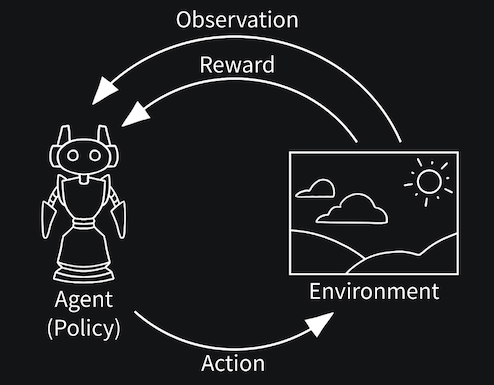

# Understanding Gymnasium Environments

The core of Gymnasium is its environment, which defines the "game" or task where your reinforcement learning algorithm will operate. Though not always a game, the environment includes key game-like characteristics:

*   **Action space**: The set of actions that can be taken in each step/episode to change the environment.
*   **Observation space**: The current state of the environment that can be observed.

Before diving into Gymnasium, it’s important to grasp some fundamental terminology:

*   **Agent**: The mechanism that receives observations and controls the actions.
*   **Step**: One round of action affecting the observation space.
*   **Episode**: A series of steps, terminating either when the agent fails to meet the objective or when the maximum number of allowed steps is reached.
*   **Render**: Gymnasium can display one frame for each episode.
*   **Reward**: A value received by the agent from the environment after each action.
*   **Non-deterministic**: Some environments introduce randomness in determining how actions affect rewards and changes in the observation space.


## Action/State spaces

Gymnasium has support for a majority of possible spaces users might need:

* **Box**: describes an n-dimensional continuous space. It’s a bounded space where we can define the upper and lower limits which describe the valid values our observations can take.
* **Discrete**: describes a discrete space where {0, 1, …, n-1} are the possible values our observation or action can take. Values can be shifted to {a, a+1, …, a+n-1} using an optional argument.
* **Dict**: represents a dictionary of simple spaces.
* **Tuple**: represents a tuple of simple spaces.
* **MultiBinary**: creates an n-shape binary space. Argument n can be a number or a list of numbers.
* **MultiDiscrete**: consists of a series of Discrete action spaces with a different number of actions in each element.

## Main API of Gymnasium

The main API methods that users of this class need to know are:

* **step()** - Updates an environment with actions returning the next agent observation, the reward for taking that actions, if the environment has terminated or truncated due to the latest action and information from the environment about the step, i.e. metrics, debug info.

* **reset()** - Resets the environment to an initial state, required before calling step. Returns the first agent observation for an episode and information, i.e. metrics, debug info.

* **render()** - Renders the environments to help visualise what the agent see, examples modes are “human”, “rgb_array”, “ansi” for text.

* **close()** - Closes the environment, important when external software is used, i.e. pygame for rendering, databases

Environments have additional attributes for users to understand the implementation

* **action_space** - The Space object corresponding to valid actions, all valid actions should be contained within the space.

* **observation_space** - The Space object corresponding to valid observations, all valid observations should be contained within the space.

* **reward_range** - A tuple corresponding to the minimum and maximum possible rewards for an agent over an episode. The default reward range is set to
.

* **spec** - An environment spec that contains the information used to initialize the environment from gymnasium.make()

* **metadata** - The metadata of the environment, i.e. render modes, render fps

* **np_random** - The random number generator for the environment. This is automatically assigned during super().reset(seed=seed) and when assessing self.np_random.

# Examples - Frozen Lake

 Frozen Lake
 https://gymnasium.farama.org/environments/toy_text/frozen_lake/

 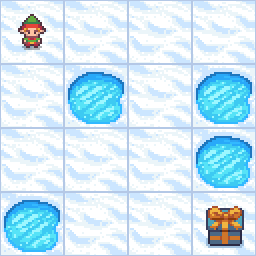

## Import environment and present specs

In [ ]:
# @title
# Description of the environment

import gymnasium as gym # Import the Gymnasium library
name = "FrozenLake-v1"  # Define the environment name (Frozen Lake game)
env = gym.make(name)    # Create an instance of the FrozenLake environment
spec = gym.spec(name)   # Get the environment’s specification (metadata/config)
print(spec)             # Print the environment specification details

env = env.unwrapped     # Access the raw, unwrapped environment (without wrappers)

print("---------------------------------")
print(f"Action Space: {env.action_space}")             # Show possible actions the agent can take
print(f"Observation Space: {env.observation_space}")   # Show possible states/observations
print(f"Max Episode Steps: {spec.max_episode_steps}")  # Max steps before episode ends
print(f"Nondeterministic: {spec.nondeterministic}")    # Whether environment has randomness
print(f"Reward Range: {env.reward_range}")             # Possible range of reward values
print(f"Reward Threshold: {spec.reward_threshold}")    # Min avg. reward to consider solved

EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, disable_env_checker=False, kwargs={'map_name': '4x4'}, namespace=None, name='FrozenLake', version=1, additional_wrappers=(), vector_entry_point=None)
---------------------------------
Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Nondeterministic: False
Reward Range: (0, 1)
Reward Threshold: 0.7


## Render the output of the Environment

In [ ]:
# @title
#Get basic information about the environment
#SOS - render and env.close() not working in MacOS Jupyter Notebook
import gymnasium as gym
#env = gym.make("FrozenLake-v1", render_mode="human")  # Create the FrozenLake environment with visual rendering (human = window)
env = gym.make("FrozenLake-v1", render_mode="ansi")  # Alternative: "ansi" would return a string representation (text grid) instead of window

print("Available Actions: ", env.action_space) # Show the action space (Discrete(4): LEFT=0, DOWN=1, RIGHT=2, UP=3)

observation, info = env.reset(seed=42)
print("Observation: ", observation)
print("info:", info)

print(env.render())  # Render the current state (lake grid shown)
env.step(1)          # Take action = 1 (DOWN); returns (obs, reward, done, truncated, info)
print(env.render())
env.step(2)
print(env.render())
env.step(0)
print(env.render())
env.close()          # Close the environment window and free resources

Available Actions:  Discrete(4)
Observation:  0
info: {'prob': 1}

SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Right)
SFFF
FHFH
FFFH
HFFG

  (Left)
SFFF
FHFH
FFFH
HFFG



## Simple agent (random selection)


Observation:  0
info: {'prob': 1}
Available Actions:  Discrete(4)


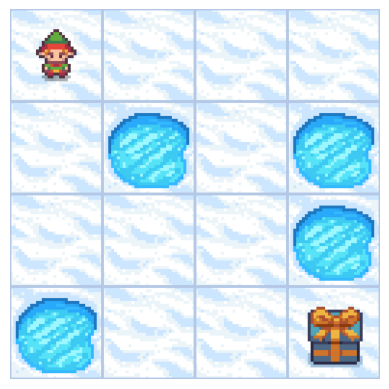

------------- Start ------------

Step 0:
Selected action:  2


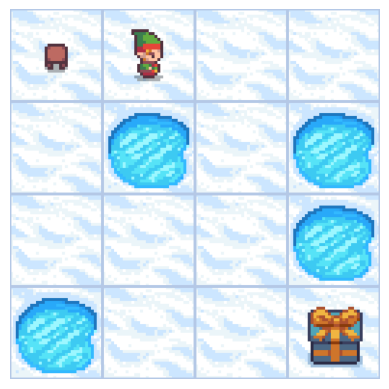

After action-> Observation:  1 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 1:
Selected action:  1


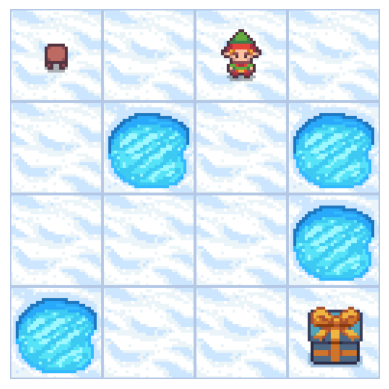

After action-> Observation:  2 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 2:
Selected action:  0


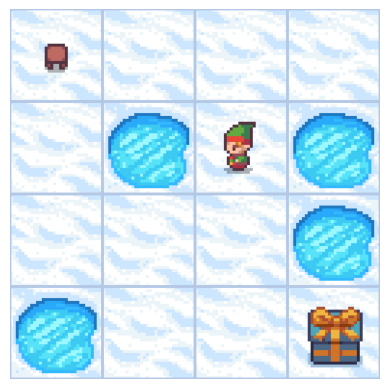

After action-> Observation:  6 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 3:
Selected action:  2


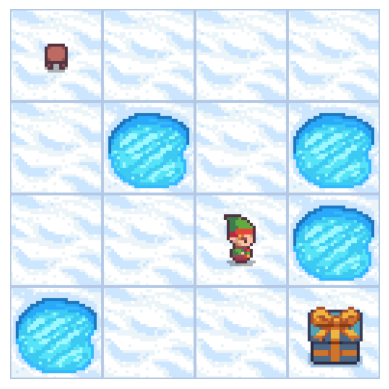

After action-> Observation:  10 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 4:
Selected action:  3


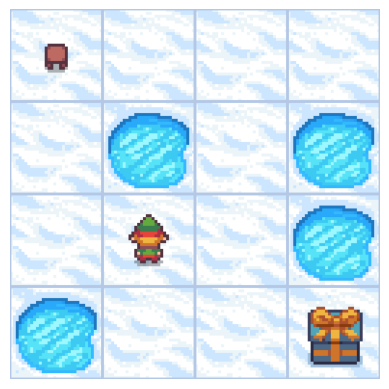

After action-> Observation:  9 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 5:
Selected action:  2


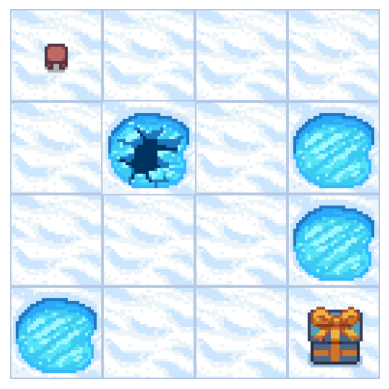

After action-> Observation:  5 |  Reward:  0.0 |  Terminated True | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________
Terminated!!

Step 6:
Selected action:  1


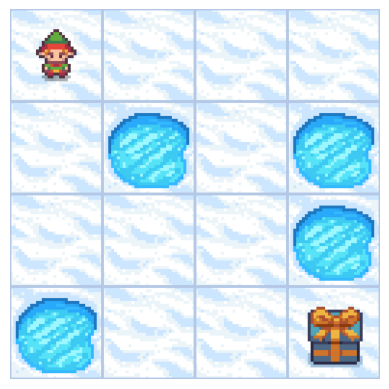

After action-> Observation:  0 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 7:
Selected action:  2


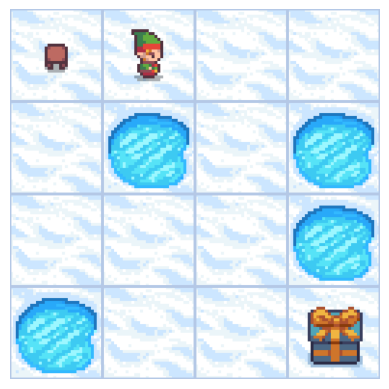

After action-> Observation:  1 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 8:
Selected action:  2


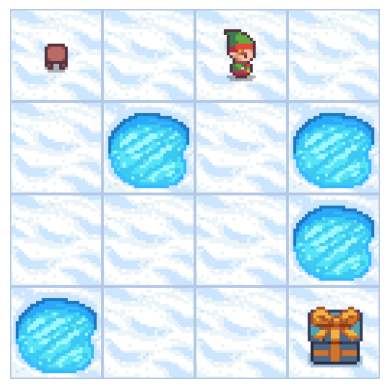

After action-> Observation:  2 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 9:
Selected action:  2


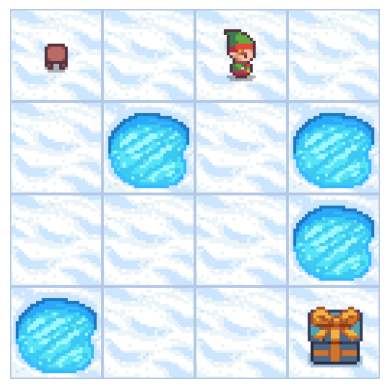

After action-> Observation:  2 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 10:
Selected action:  2


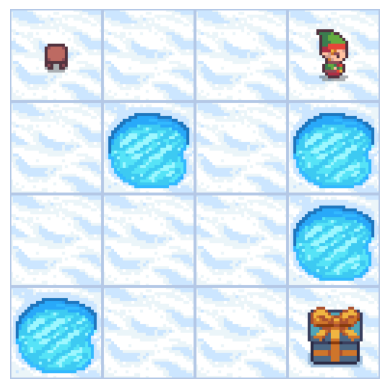

After action-> Observation:  3 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 11:
Selected action:  0


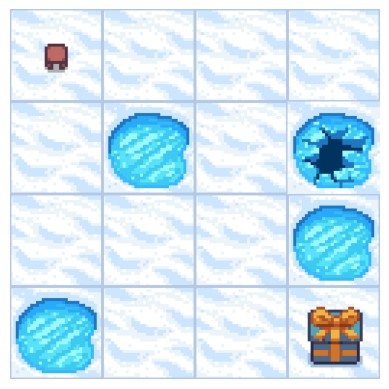

After action-> Observation:  7 |  Reward:  0.0 |  Terminated True | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________
Terminated!!

Step 12:
Selected action:  0


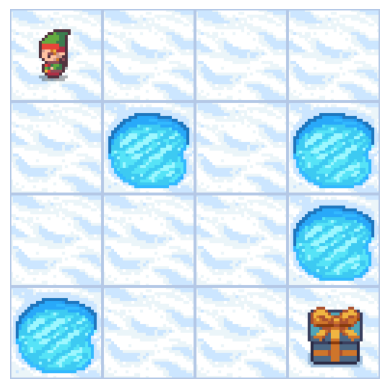

After action-> Observation:  0 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________

Step 13:
Selected action:  1


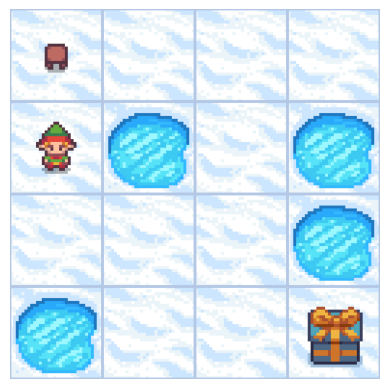

After action-> Observation:  4 |  Reward:  0.0 |  Terminated False | Truncated False | info: {'prob': 0.3333333333333333}
________________________________________________________________________________________________________________________
-------------- End -------------


In [ ]:
# @title
import matplotlib.pyplot as plt  # Import matplotlib for image visualization

def show_render(output_arrar):   # Function the displays the render as image
    plt.imshow(output_arrar)
    plt.axis('off')
    plt.show()

def agent(actions):     # function that creates an agent that selects randomly an action from the action space
  seleted_action = actions.sample()
  return seleted_action


import gymnasium as gym
env = gym.make("FrozenLake-v1", render_mode="rgb_array")
observation, info = env.reset(seed=42)
print("Observation: ", observation)
print("info:", info)
print("Available Actions: ", env.action_space)
show_render(env.render())

print("------------- Start ------------")
for step in range(14):
    print(f"\nStep {step}:")

    action = agent(env.action_space)
    print("Selected action: ", action)

    observation, reward, terminated, truncated, info = env.step(action)
    show_render(env.render())
    print("After action-> Observation: ",observation, "|  Reward: ",reward, "|  Terminated", terminated, "| Truncated", truncated, "| info:", info)
    print("_"*120)

    if terminated or truncated:
        observation, info = env.reset()
        print("Terminated!!")

env.close()
print("-------------- End -------------")

## Description of Inputs and Outputs


Parameters:
*  **action (ActType)** – an action provided by the agent to update the environment state.

Returns:
*  **observation (ObsType)** – An element of the environment’s *observation_space* as the next observation due to the agent actions. An example is a numpy array containing the positions and velocities of the pole in CartPole.

*  **reward (SupportsFloat)** – The reward as a result of taking the action.

*  **terminated (bool)** – Whether the agent reaches the terminal state (as defined under the MDP of the task) which can be positive or negative. An example is reaching the goal state or moving into the lava from the Sutton and Barton, Gridworld. If true, the user needs to call *reset()*.

*  **truncated (bool)** – Whether the truncation condition outside the scope of the MDP is satisfied. Typically, this is a timelimit, but could also be used to indicate an agent physically going out of bounds. Can be used to end the episode prematurely before a terminal state is reached. If true, the user needs to call reset().

*  **info (dict)** – Contains auxiliary diagnostic information (helpful for debugging, learning, and logging). This might, for instance, contain: metrics that describe the agent’s performance state, variables that are hidden from observations, or individual reward terms that are combined to produce the total reward. In OpenAI Gym <v26, it contains “TimeLimit.truncated” to distinguish truncation and termination, however this is deprecated in favour of returning terminated and truncated variables.


# CartPole example

CartPole description: [https://gymnasium.farama.org/environments/classic_control/cart_pole/](https://gymnasium.farama.org/environments/classic_control/cart_pole/)

[-0.02235441  0.04219582 -0.00148307 -0.04078201]

Step 0:


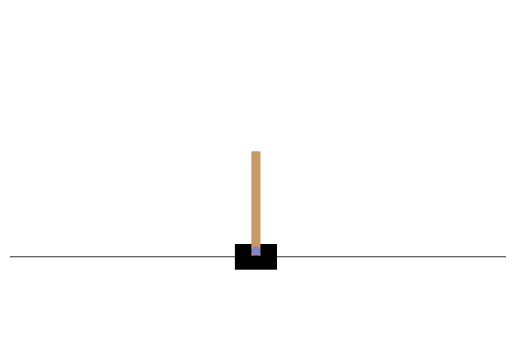

Selected action:  0
After action-> Observation:  [-0.02151049 -0.15290484 -0.00229871  0.25143263] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 1:


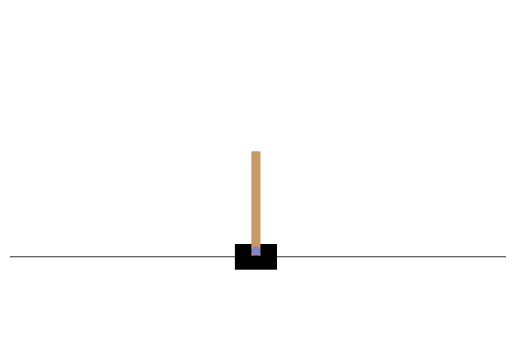

Selected action:  0
After action-> Observation:  [-0.02456859 -0.34799388  0.00272994  0.5433896 ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 2:


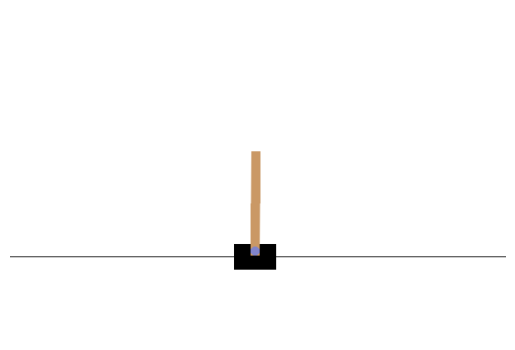

Selected action:  1
After action-> Observation:  [-0.03152847 -0.15291041  0.01359773  0.25156808] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 3:


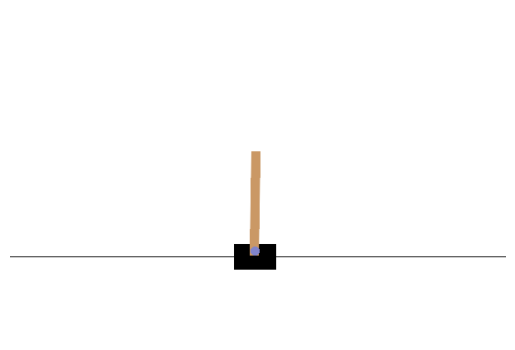

Selected action:  1
After action-> Observation:  [-0.03458668  0.04201476  0.01862909 -0.03679504] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 4:


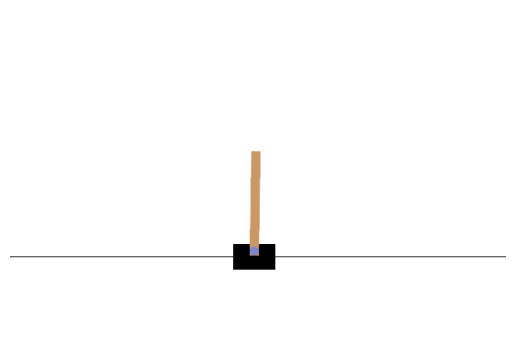

Selected action:  1
After action-> Observation:  [-0.03374638  0.23686469  0.01789319 -0.32354257] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 5:


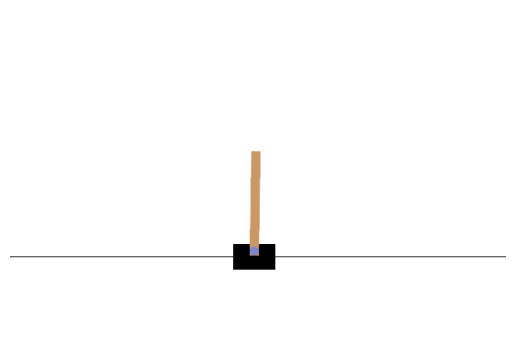

Selected action:  1
After action-> Observation:  [-0.02900909  0.43172735  0.01142234 -0.6105294 ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 6:


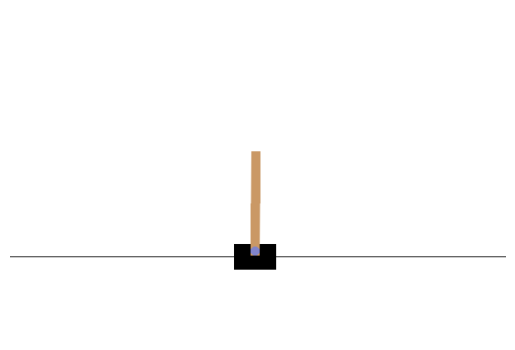

Selected action:  1
After action-> Observation:  [-2.0374540e-02  6.2668777e-01 -7.8824855e-04 -8.9959294e-01] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 7:


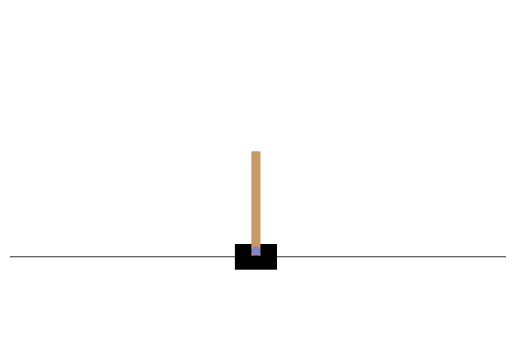

Selected action:  0
After action-> Observation:  [-0.00784078  0.43157652 -0.01878011 -0.6071579 ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 8:


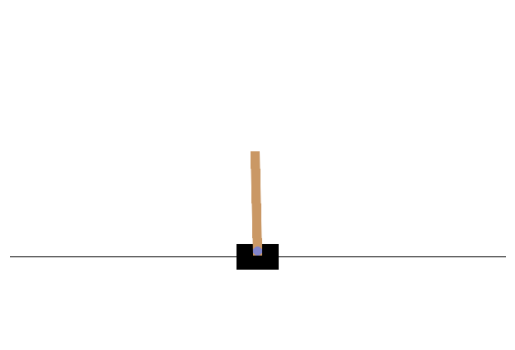

Selected action:  0
After action-> Observation:  [ 0.00079075  0.23672211 -0.03092326 -0.32044885] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 9:


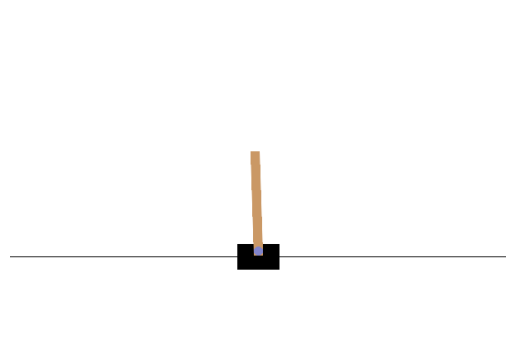

Selected action:  0
After action-> Observation:  [ 0.00552519  0.04205389 -0.03733224 -0.03767609] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 0:


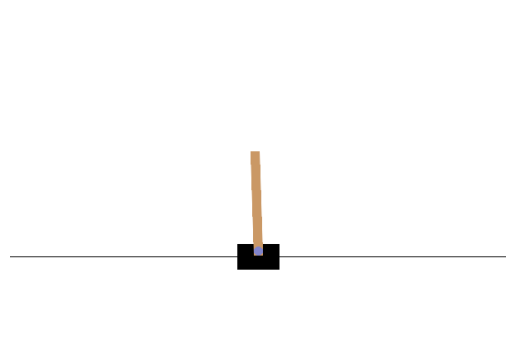

Selected action:  0
After action-> Observation:  [ 0.00636627 -0.15251338 -0.03808576  0.24299833] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 1:


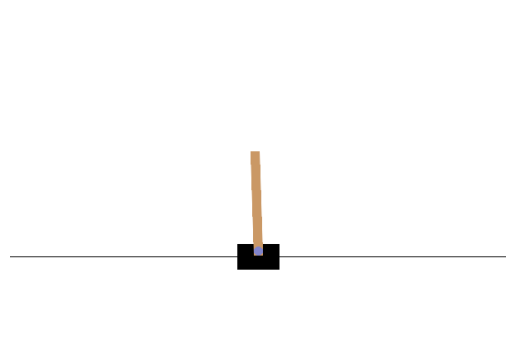

Selected action:  0
After action-> Observation:  [ 0.003316  -0.3470712 -0.0332258  0.5234289] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 2:


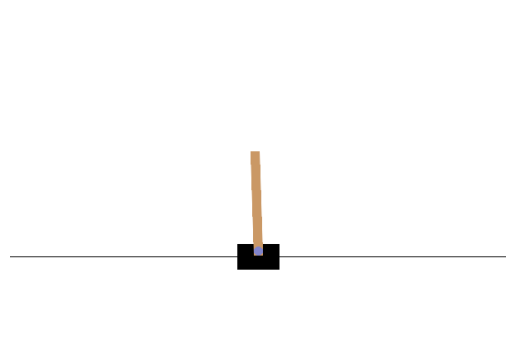

Selected action:  0
After action-> Observation:  [-0.00362543 -0.5417102  -0.02275722  0.8054596 ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 3:


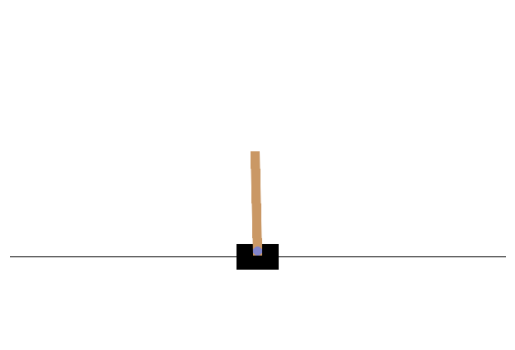

Selected action:  0
After action-> Observation:  [-0.01445963 -0.7365129  -0.00664803  1.090898  ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 4:


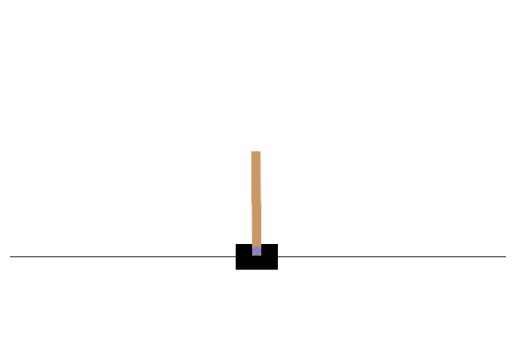

Selected action:  0
After action-> Observation:  [-0.02918989 -0.93154657  0.01516994  1.3814876 ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 5:


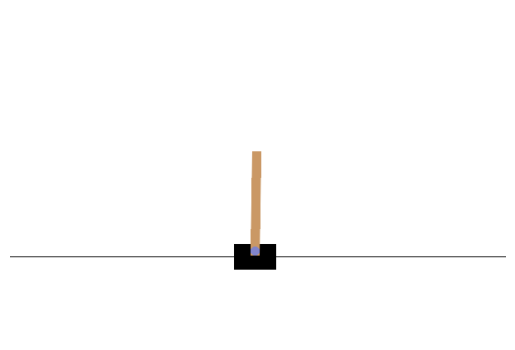

Selected action:  1
After action-> Observation:  [-0.04782082 -0.7366172   0.04279969  1.0935869 ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 6:


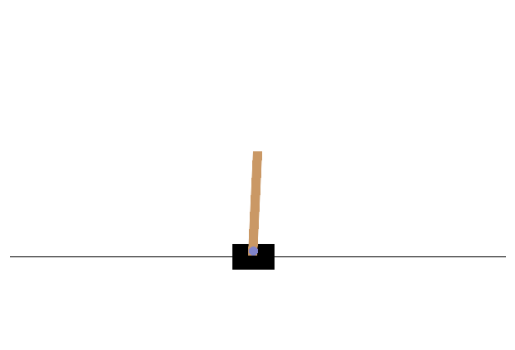

Selected action:  1
After action-> Observation:  [-0.06255316 -0.54208446  0.06467143  0.8146343 ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 7:


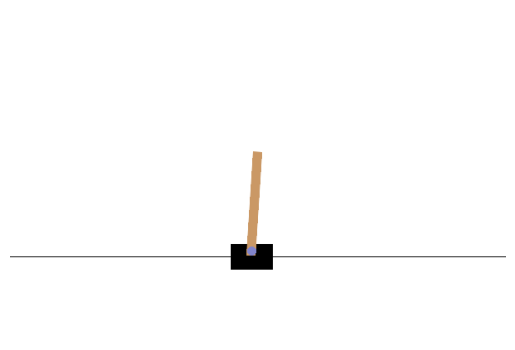

Selected action:  1
After action-> Observation:  [-0.07339485 -0.3479049   0.08096411  0.542974  ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 8:


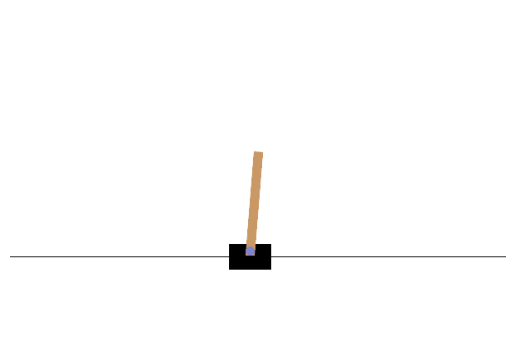

Selected action:  1
After action-> Observation:  [-0.08035295 -0.15400855  0.09182359  0.2768597 ] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________

Step 9:


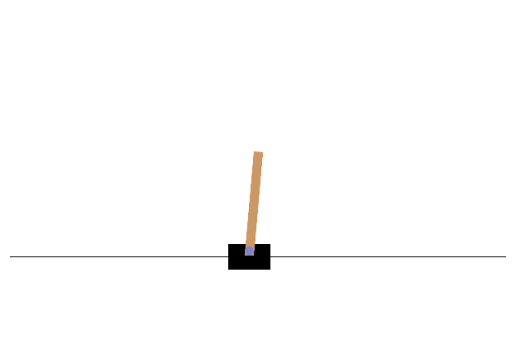

Selected action:  1
After action-> Observation:  [-0.08343312  0.0396916   0.09736078  0.01449173] |  Reward:  1.0 |  Terminated False | Truncated False | info: {}
________________________________________________________________________________________________________________________


In [ ]:
# @title
import matplotlib.pyplot as plt
def show_render(output_arrar):
    plt.imshow(output_arrar)
    plt.axis('off')
    plt.show()

def agent2(obs):
   angle = obs[2]
   return 0 if angle < 0 else 1

import gymnasium as gym
env = gym.make("CartPole-v1", render_mode="rgb_array")
observation, info = env.reset()
print(observation)

total = []
for episode in range(2):
    episode_rewards = 0

    for step in range(10):
        print(f"\nStep {step}:")
        show_render(env.render())

        action = agent2(observation)
        print("Selected action: ", action)

        observation, reward, terminated, truncated, info = env.step(action)
        episode_rewards += reward
        print("After action-> Observation: ",observation, "|  Reward: ",reward, "|  Terminated",terminated, "| Truncated", truncated, "| info:", info)
        print("_"*120)

        if terminated or truncated:
            observation, info = env.reset()
            print("Terminated!!")

env.close()

# How to create new environment

In [ ]:
# @title
import gymnasium
from gymnasium import error, spaces, utils
from gymnasium.utils import seeding

class FooEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # TODO
        ...
    def step(self, action):
        # TODO
        ...
    def reset(self):
        # TODO
        ...
    def render(self, mode='human'):
        # TODO
        ...
    def close(self):
        # TODO
        ...

# New Custom Environment example


This example will simulate a grid where the agent can move left or right to collect points. The environment will give a positive reward for reaching the goal on the right and a negative reward for going too far to the left.

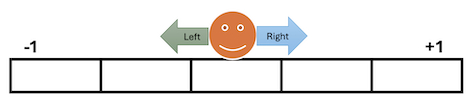

**Explanation**:

***Environment (SimpleGridEnvironment)***:
* The environment is a 1D grid with 5 positions (0 to 4), and the agent starts in the middle (2).
* The goal is to reach the far right (4), which gives a reward of 1.0.
* Moving to the far left (0) results in a penalty of -1.0.
* Moving between these positions results in a reward of 0.0.
* The agent has a maximum of 10 steps to complete its task.

***Agent (SimpleAgent)***:
* The agent can choose to move either left or right at each step.
* It accumulates rewards based on its movement.
* The agent's choices are random in this example.

***Main Loop***:
* The agent interacts with the environment until it either runs out of steps or reaches the goal.
* At each step, the agent observes its position, chooses an action, and receives a reward.

In [ ]:
# @title
import random

# Define the environment where the agent moves left or right on a 1D grid
class SimpleGridEnvironment:
    def __init__(self, grid_size=5):
        self.grid_size = grid_size
        self.agent_position = grid_size // 2  # Start in the middle of the grid
        self.goal_position = grid_size - 1  # Goal is at the far right of the grid
        self.min_position = 0  # The far left of the grid
        self.max_steps = 10  # Limit the total number of steps the agent can take
        self.remaining_steps = self.max_steps

    def get_observation(self):
        return self.agent_position  # The agent observes its position on the grid

    def get_actions(self):
        return ["left", "right"]  # The agent can move left or right

    def check_is_done(self):
        return self.remaining_steps == 0 or self.agent_position == self.goal_position

    def action(self, action):
        if self.check_is_done():
            raise Exception("Game over")

        # Update agent's position based on the action
        # Move left or right, ensuring the position stays within bounds
        if action == "left":
            self.agent_position = max(self.min_position, self.agent_position - 1)
        elif action == "right":
            self.agent_position = min(self.goal_position, self.agent_position + 1)

        self.remaining_steps -= 1

        # Reward: +1 for reaching the goal, -1 for going to the far left, 0 otherwise
        if self.agent_position == self.goal_position:
            return 1.0  # Goal reached
        elif self.agent_position == self.min_position:
            return -1.0  # Far left penalty
        else:
            return 0.0  # No reward in between

# Define the agent that interacts with the grid environment
class SimpleAgent:
    def __init__(self):
        self.total_rewards = 0.0

    def step(self, env: SimpleGridEnvironment):
        current_position = env.get_observation()
        print(f"Agent's current position: {current_position}")

        available_actions = env.get_actions()
        print(f"Available actions: {available_actions}")

        # Randomly choose an action
        chosen_action = random.choice(available_actions)
        print(f"Agent chose to move: {chosen_action}")

        # Execute the action and get the reward
        reward = env.action(chosen_action)
        self.total_rewards += reward

        print(f"Reward for this action: {reward}")
        print(f"Total rewards so far: {self.total_rewards:.2f}\n")


# Main loop where the agent interacts with the environment
if __name__ == '__main__':
    env = SimpleGridEnvironment(grid_size=5)  # Create a 5-cell grid
    agent = SimpleAgent()
    step_count = 0

    while not env.check_is_done():
        step_count += 1
        print(f"Step {step_count}:")
        agent.step(env)

    print(f"Game over! Total reward accumulated by the agent: {agent.total_rewards:.2f}")

Step 1:
Agent's current position: 2
Available actions: ['left', 'right']
Agent chose to move: right
Reward for this action: 0.0
Total rewards so far: 0.00

Step 2:
Agent's current position: 3
Available actions: ['left', 'right']
Agent chose to move: right
Reward for this action: 1.0
Total rewards so far: 1.00

Game over! Total reward accumulated by the agent: 1.00
